In [1]:
import matplotlib.pyplot as plt
import numpy as np


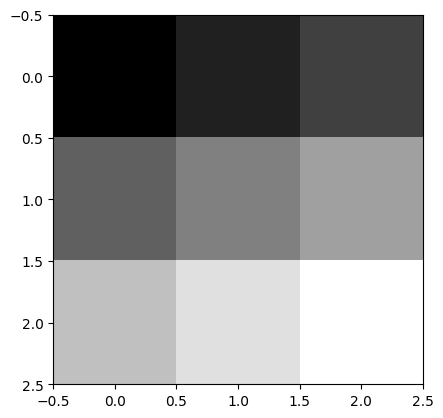

In [2]:
img = np.array([[1,2,3],[4,5,6],[7,8,9]])
plt.imshow(img, cmap='gray')

In [3]:
H, W = 3, 3  # image size

# Generate coordinate grid
x_indices, y_indices = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')
x_indices,y_indices

(array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]]),
 array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]))

In [4]:
shear = np.array([[1,1],[0,1]])

In [5]:
pos_mat = np.vstack((x_indices,y_indices)).reshape(2,-1)
pos_mat

array([[0, 0, 0, 1, 1, 1, 2, 2, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [6]:
tra_mat_loc = shear@pos_mat
tra_mat_loc

array([[0, 1, 2, 1, 2, 3, 2, 3, 4],
       [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [7]:
tra_mat = np.zeros((np.max(tra_mat_loc,axis=1)+1))
tra_mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [8]:
tra_mat[tra_mat_loc[0],tra_mat_loc[1]] = img.flatten()

In [9]:
tra_mat

array([[1., 0., 0.],
       [4., 2., 0.],
       [7., 5., 3.],
       [0., 8., 6.],
       [0., 0., 9.]])

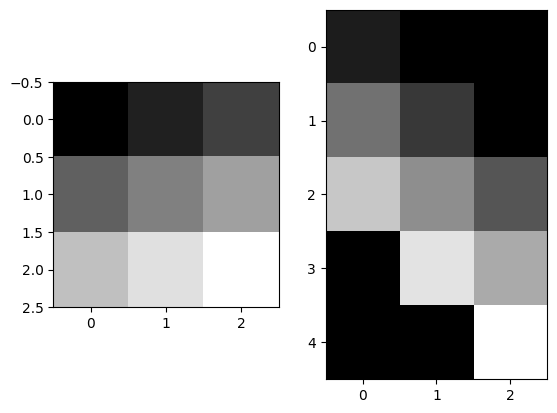

In [10]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img,cmap='gray')
axs[1].imshow(tra_mat,cmap='gray')

In [11]:
def shear_coordinates(H,W,k=1):
    x_indices, y_indices = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')
    shear = np.array([[1,k],[0,1]])
    pos_mat = np.vstack((x_indices,y_indices)).reshape(2,-1)
    tra_mat_loc = np.matmul(shear,pos_mat)
    
    return tra_mat_loc    

In [12]:
img = plt.imread("download.jpeg") 
img.shape

(183, 275, 3)

In [13]:
cord = shear_coordinates(*img.shape[:-1])
cord

array([[  0,   1,   2, ..., 454, 455, 456],
       [  0,   1,   2, ..., 272, 273, 274]], shape=(2, 50325))

In [29]:
tra_mat = np.zeros((*(np.max(cord,axis=1)+1),3),dtype=np.int8)
tra_mat

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(457, 275, 3), dtype=int8)

In [30]:
tra_mat.shape

(457, 275, 3)

In [31]:
tra_mat[[0,1]]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(2, 275, 3), dtype=int8)

In [32]:
tra_mat[cord[0],cord[1]]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], shape=(50325, 3), dtype=int8)

In [33]:
img.reshape(-1,3)

array([[ 0, 52,  6],
       [ 0, 54,  5],
       [ 0, 56,  5],
       ...,
       [ 3, 89, 28],
       [ 3, 89, 28],
       [ 3, 89, 28]], shape=(50325, 3), dtype=uint8)

In [34]:
tra_mat[cord[0],cord[1]] = img.reshape(-1,3)

In [ ]:
plt.imshow()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-128..127].


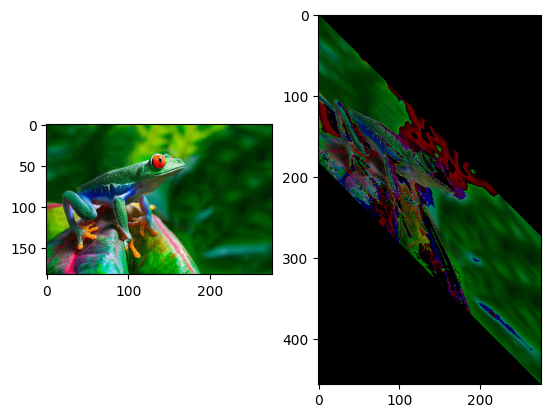

In [38]:
_,ax=plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(tra_mat)